# 워드클라우드 (영문)

텍스트 마이닝 분야에서 사용되는 시각화 방법으로 단어의 등장 빈도를 표현한다.

`wordcloud` 패키지 설치가 필요하다.

## 실습용 파일 다운로드

아래 URL에 다운로드 받은 후 `D-05-(5) 워드클라우드` 폴더 안에 압축을 해제한다.

> https://data.hossam.kr/tmdata/wordcloud.zip

## #01. 준비작업

### [1] 패키치 참조

In [10]:
import warnings
warnings.filterwarnings(action='ignore')        #주피터에게 하는 말

import numpy as np

# 이미지 출력을 위한 jupyter 전용 기능
from IPython.display import Image, display

# 워드클라우드 클래스
from wordcloud import WordCloud

# 금지어 설정 모듈
from wordcloud import STOPWORDS

# 이미지 처리 모듈 (파이썬 기본 내장)
from PIL import Image as Img

### [2] 데이터 가져오기

텍스트 데이터가 필요하므로 `txt` 파일을 읽어온다.

In [3]:
with open("wordcloud/이상한나라의앨리스.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Alice's Adventures in Wonderland
       Illustrated by Arthur Rackham. With a Proem by Austin Dobson

Author: Lewis Carroll

Illustrator: Arthur Rackham

Release Date: May 19, 2009 [EBook #28885]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***




Produced by Jana Srna, Emmy and the Online Distributed
Proofreading Team at http://www.pgdp.net (This file was
produced from images generously made available by the
University of Florida Digital Collections.)











ALICE'S ADVENTURES IN WONDERLAND

[Illustration: "Alice"]

[Illustration:

          ALICE'S·ADVENTURES
          IN·WONDERLAND
          BY·LEWIS·CAR

## #02. 기본 사용 방법

In [11]:
# 워드 클라우드 클래스의 객체 생성 -> 생성될 가로,세로 크기 지정(px단위)
wc = WordCloud(width=1200, height=800)

# 읽어들인 텍스트 내용을 generate 메서드에 전달
wc.generate(text)

# wc.words_ 는 산정된 각 단어별 빈도수에 대한 딕셔너리이다.
# print(wc.words_)

# 그래픽 표시 데이터를 단어 빈도수에 대한 딕셔너리로 지정
wc.to_file("simple.png")

# 이미지를 출력하기 위한 jupyter 전용 코드
display(Image(filename='simple.png'))

{'said': 1.0, 'Alice': 0.7114285714285714, 'said Alice': 0.3314285714285714, 'little': 0.32, 'one': 0.3, 'know': 0.2571428571428571, 'Project Gutenberg': 0.24857142857142858, 'thing': 0.23714285714285716, 'Queen': 0.2342857142857143, 'went': 0.23142857142857143, 'time': 0.2257142857142857, 'see': 0.19714285714285715, 'head': 0.18285714285714286, 'well': 0.18285714285714286, 'King': 0.18285714285714286, 'now': 0.17714285714285713, 'way': 0.17142857142857143, 'Mock Turtle': 0.16857142857142857, 'began': 0.16285714285714287, 'Hatter': 0.16285714285714287, 'Gutenberg tm': 0.16285714285714287, 'Gryphon': 0.15714285714285714, 'say': 0.15428571428571428, 'much': 0.14857142857142858, 'quite': 0.14857142857142858, 'must': 0.14857142857142858, 'first': 0.1457142857142857, 'come': 0.1457142857142857, 'go': 0.1457142857142857, 'never': 0.14, 'thought': 0.14, 'think': 0.13714285714285715, 'voice': 0.13428571428571429, 'looked': 0.13428571428571429, 'work': 0.13142857142857142, 'got': 0.128571428571

## #03. WordCloud 객체의 옵션

### [1] 금지어 설정

In [5]:
# 금지어 설정 --> 필요한 만큼 add()함수를 호출하여 추가
ignore = set(STOPWORDS)
ignore.add("said")
ignore.add("Alice")

### [2] 마스크 이미지 설정

In [6]:
img = Img.open("wordcloud/앨리스배경.png")
iarr = np.array(img)
iarr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### [3] 워드 클라우드 확인

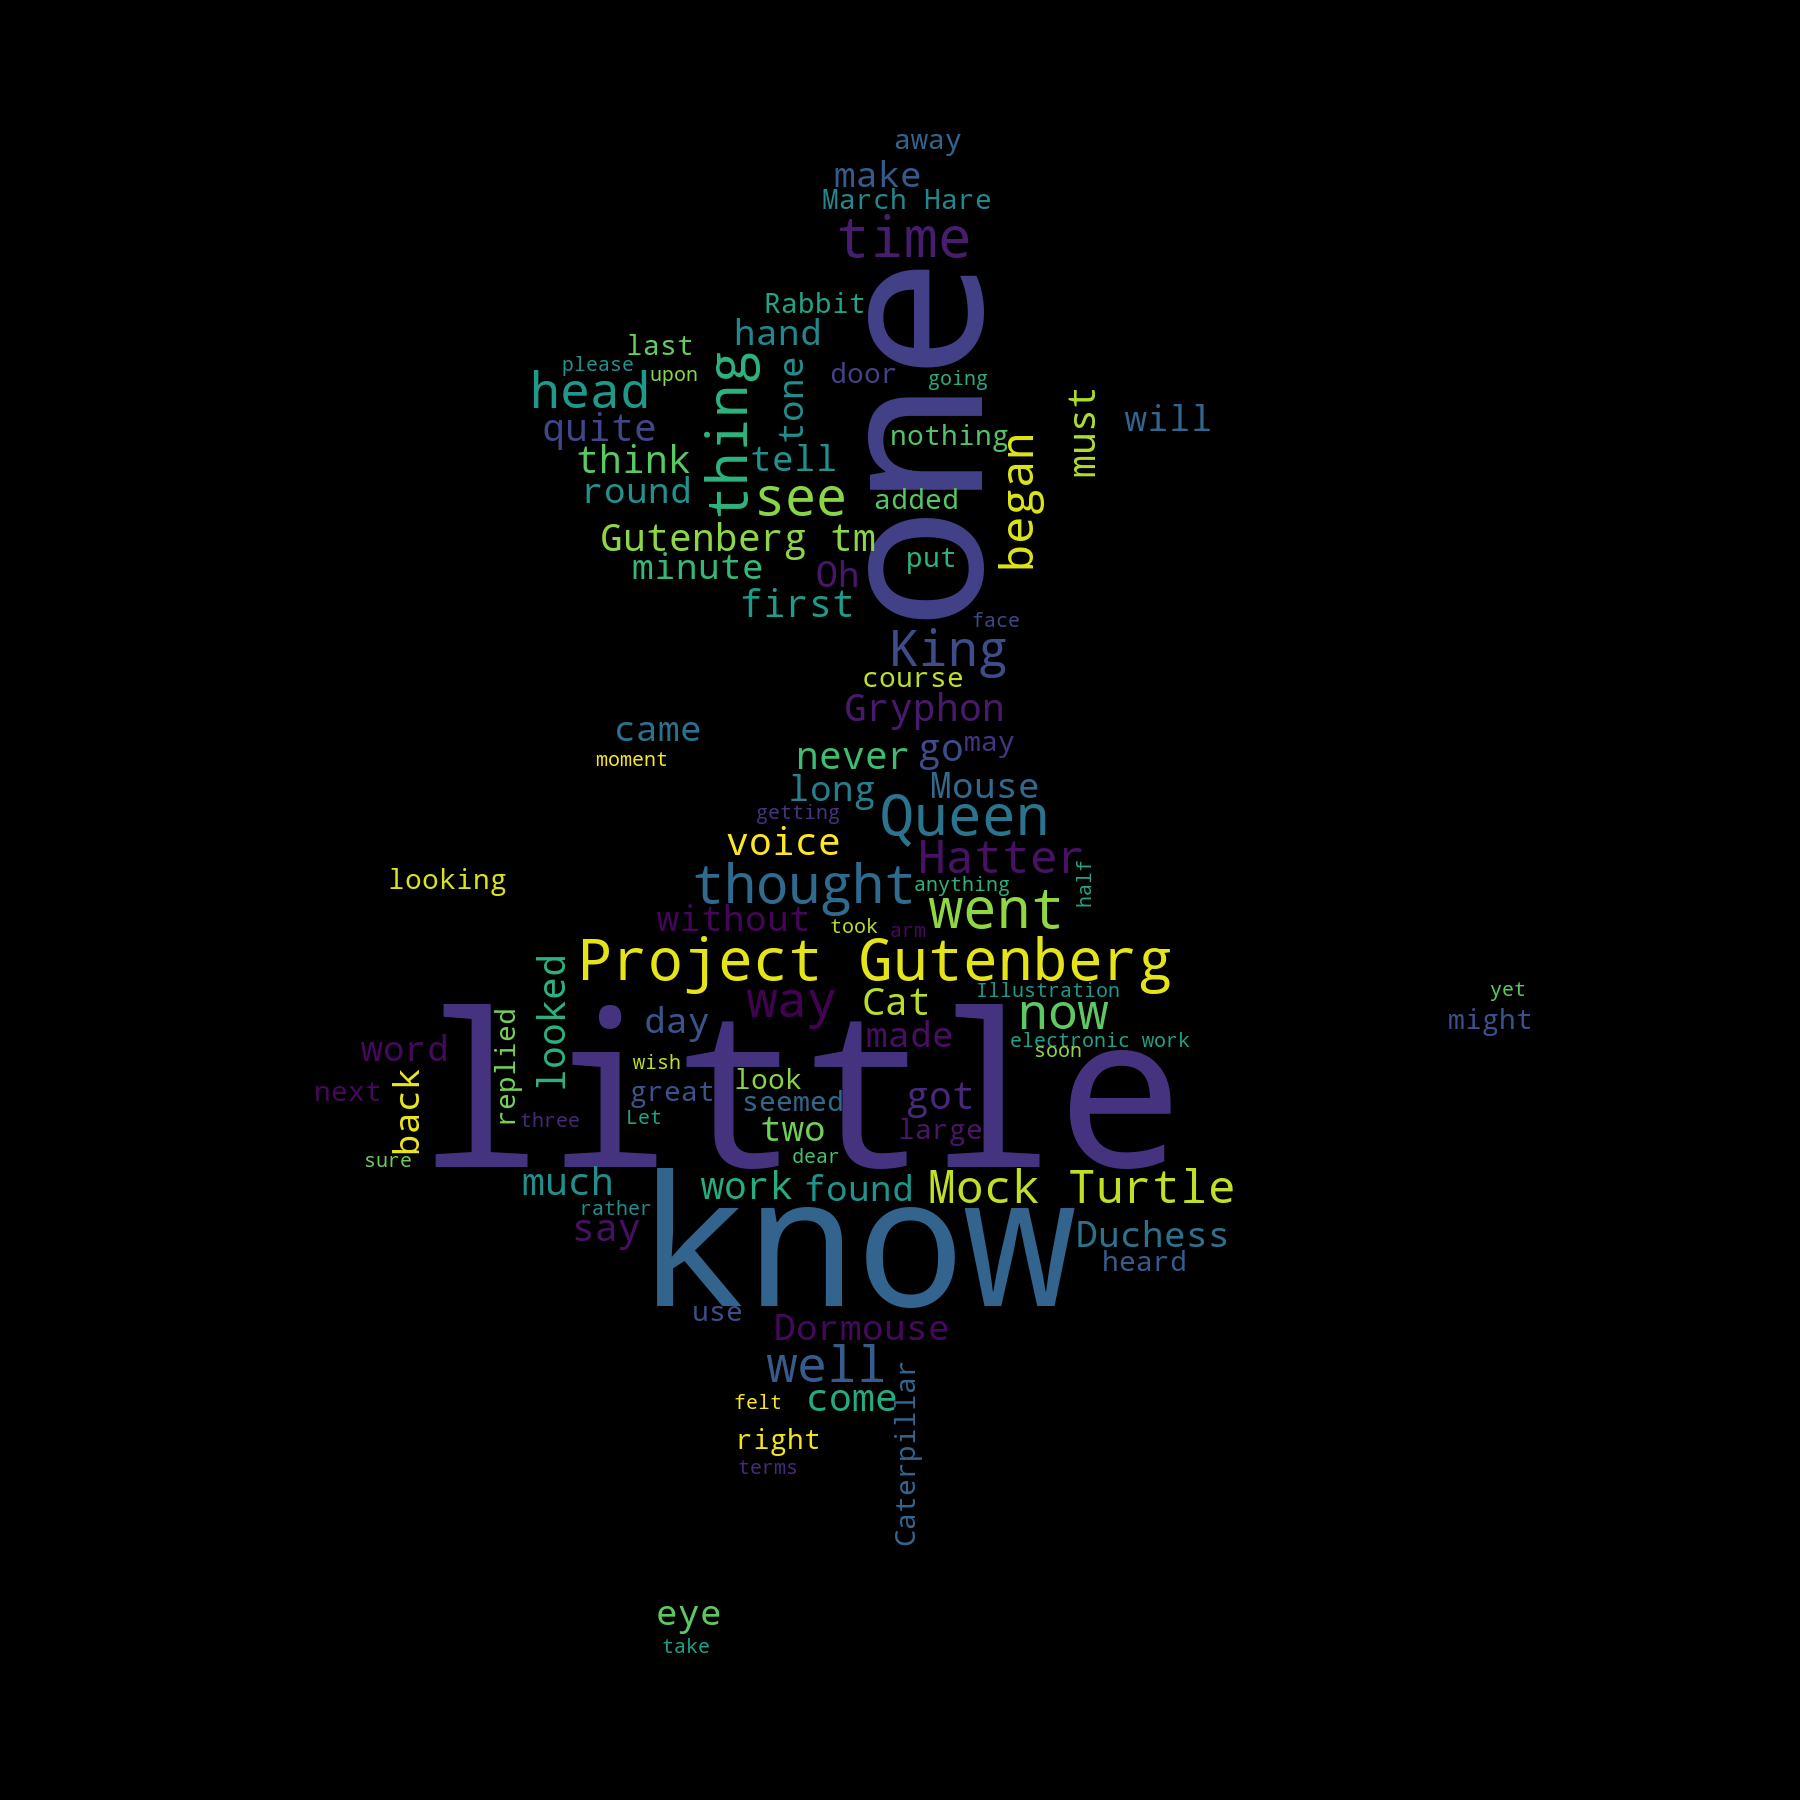

In [7]:
wc = WordCloud(width=600, height=1200,
               max_font_size=150,   # 최대 글자 크기
               scale=2.0,           # 이미지 스케일 (dpi=200과 동일)
               max_words=100,       # 워드 클라우드에 담을 최대 단어 수
               stopwords=ignore,    # 금지어 목록
               mask=iarr            # 마스크로 사용할 이미지 배열
            )
wc.generate(text)
wc.to_file("options.png")
display(Image(filename='options.png'))

## #03. 색상 설정

### [1] 글자색상을 반환하는 함수

함수 이름은 상관 없지만 콜백함수로서 사용되므로 파라미터는 사전에 API가 정해놓은 규칙에 따라 정의해야 한다.

이 함수는 Wordcloud 객체에 의해서 단어수만큼 호출 당하는 함수

In [8]:
def get_color(word, font_size, position, orientation, random_state=None, **kwargs):
    # case1) 단일 색상 지정
    #color = "#1550b0"
    #color = "rgb(21, 80, 176)"
    #color = "hsl(217, 30%, 87%)"
    #return color

    # case2)
    # random_state.seed()                   # 랜덤숫자 카드를 섞는다.
    # r = random_state.randint(0, 255)      # red
    # g = random_state.randint(0, 255)      # green
    # b = random_state.randint(0, 255)      # blue
    # color = "rgb(%d, %d, %d)" % (r, g, b) # rgb(21, 80, 176) 형식으로 색상문자열 생성
    # return color

    # case3) hsl 형식 색상 지정
    # - 색상(H) : 0 ~ 360, 원형의 색상 띠 (`빨주노초파남보`는 대략 51˚씩 차이)
    # - 채도(S) : 0 ~ 100% , 색상의 순도 (빨갛다 ~ 새빨갛다 등)
    # - 명도(L) : 0(어둠,검게 보임) ~ 100(밝음,하얗게 보임)%, 색의 밝기
    random_state.seed()                     # 랜덤숫자 카드를 섞는다.
    a = random_state.randint(30, 90)        # 채도를 랜덤하게 설정
    b = random_state.randint(30, 90)        # 명도를 랜덤하게 설정
    color = "hsl(270, %d%%, %d%%)" % (a, b) # hsl(270, 54% 32%) 형식으로 문자열 생성
    return color

### 워드클라우드 생성

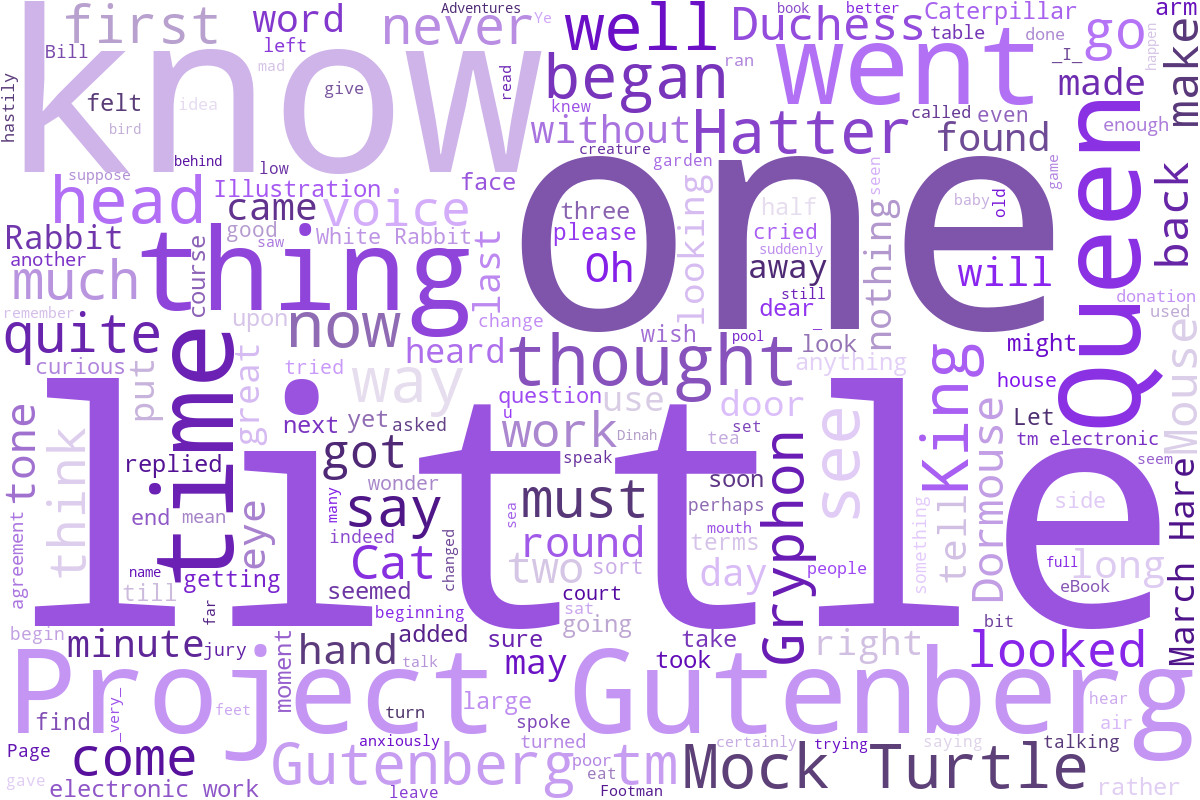

In [9]:
# background_color 파라미터를 통해 배경색상을 설정할 수 있다.
wc = WordCloud(width=1200, height=800, stopwords=ignore, background_color="#ffffff")
wc.generate(text)

# 단어의 색상을 반환할 함수를 연결
# -> 색상값을 리턴해 줄 함수의 이름과 random_state 기능 사용 여부 설정
#    여기서 설정한 random_state에 따라 make_colors 함수 안에서 랜덤값을
#    사용할 수 있을지가 결정된다.
wc.recolor(color_func=get_color, random_state=True)

wc.to_file("colors.png")
display(Image(filename='colors.png'))